# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Kiran Reddy Bhumireddy  <br>
Roll Number: 2020101064

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
cost function =  $1 / m \Sigma|Y_{pred} - Y|$ ,</br>
we use gradient descent to update the weights for some iterations</br>
This is repeated over a set of $\eta$ values and the best learning rate with fixed iterations is choosed 

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
# implement Linear Regression
def compute_y_hat(X_new, w, i):
    return (w @ np.transpose(X_new[i]))
    
def compute_delta_w(X_new, y, w, m, learning_rate):
    delta_w = np.array([0.0] * 5)
    c = -(2 * learning_rate / m)
    
    for i in range(len(w)):
        for j in range(m):
            delta_w[i] += X_new[j][i] * ((compute_y_hat(X_new, w, j)) - y[j])

    return c * delta_w


learning_rate_vals = np.arange(0.001, 1, 0.001)
w_matrix = []
error_vals = np.zeros(len(learning_rate_vals))


m = len(y_train)
col = np.ones(m, int)
X_new = np.insert(x_train, 0, col, axis = 1)

iterations = 100

for j in range(len(learning_rate_vals)):
    w = np.array([1] * 5) ### init w (parameters to estimate)
    
    for i in range(iterations):
        delta_w = compute_delta_w(X_new, y_train, w, m, learning_rate_vals[j])
        w = w + delta_w
    
    w_matrix.append(w)
    error_vals[j] = np.sum(np.square(delta_w))

4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

Best Learning Rate:  0.68


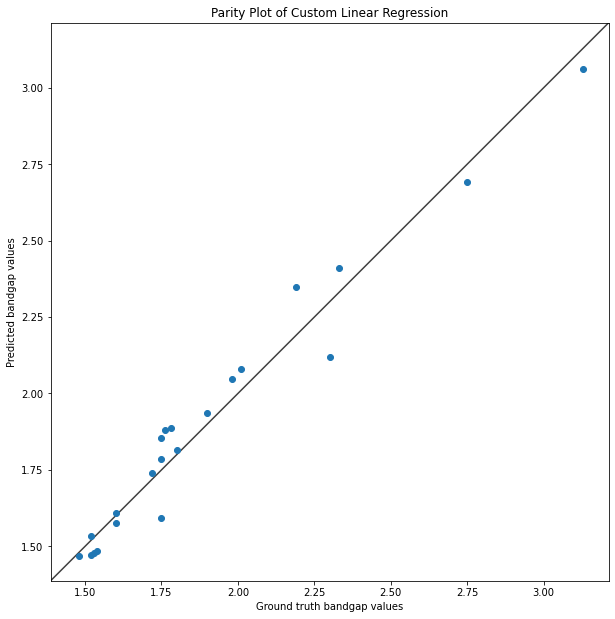

In [4]:
# Get the predictions of x_test into `y_pred`

w = w_matrix[np.argmin(error_vals)]
print("Best Learning Rate: ", np.round(learning_rate_vals[np.argmin(error_vals)], 2))

m = len(y_test)
col = np.ones(m, int)
x = np.insert(x_test, 0, col, axis = 1)
y_pred = w @ np.transpose(x)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

1. When the model is overfit we introduce a small amount of bias to reduce the variance of the model.
2. In addition to the sum of squares of the residuals Ridge regression minimizes $\alpha * \Sigma W^2$.
3. Ridge regression provides better long-term predictions.

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)
>Parameter `alpha` introduces a bias to decrease the overfitting of the linear model we use this extra component in loss function.
2. As we can see in the results here the RMSE values increased and then decreased the model changed from overfit to underfit at at some point in between it is best fit

In [5]:
# you should not have imported sklearn before this point
import sklearn

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
n_samples, n_features = len(y_train), len(x_train[0]) - 1

alpha_vals = np.arange(0.001, 1, 0.001)
ridge_scores = []


for i in range(len(alpha_vals)):
    clf = Ridge(alpha_vals[i])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ridge_scores.append(mean_squared_error(y_pred, y_test, squared=False))

from tabulate import tabulate

head = ["alpha", "RMSE"]
data = []


for i in range(len(ridge_scores)):
    data.append([alpha_vals[i], ridge_scores[i]])


print(tabulate(data, headers = head, tablefmt="grid"))

+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|   0.001 | 0.084322  |
+---------+-----------+
|   0.002 | 0.0843432 |
+---------+-----------+
|   0.003 | 0.0843645 |
+---------+-----------+
|   0.004 | 0.0843858 |
+---------+-----------+
|   0.005 | 0.0844072 |
+---------+-----------+
|   0.006 | 0.0844286 |
+---------+-----------+
|   0.007 | 0.0844501 |
+---------+-----------+
|   0.008 | 0.0844716 |
+---------+-----------+
|   0.009 | 0.0844932 |
+---------+-----------+
|   0.01  | 0.0845149 |
+---------+-----------+
|   0.011 | 0.0845366 |
+---------+-----------+
|   0.012 | 0.0845584 |
+---------+-----------+
|   0.013 | 0.0845802 |
+---------+-----------+
|   0.014 | 0.0846021 |
+---------+-----------+
|   0.015 | 0.0846241 |
+---------+-----------+
|   0.016 | 0.0846461 |
+---------+-----------+
|   0.017 | 0.0846681 |
+---------+-----------+
|   0.018 | 0.0846902 |
+---------+-----------+
|   0.019 | 0.0847124 |
+---------+-----------+
|   0.02  | 0.08

### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.
1. When the model is overfit we introduce a small amount of bias to reduce the variance of the model.
2. In Lasso we introduce an additial term ib loss function, i.e $\alpha *1/2N *   \Sigma |W|$.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.
>Parameter `alpha` introduces a bias to decrease the overfitting of the linear model we use this extra component in loss function.
2. As we can see in the results here the RMSE values increased and then decreased the model changed from overfit to underfit at at some point in between it is best fit

In [13]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso

lasso_scores = []
alpha_vals = np.arange(0.001, 1, 0.001)

for i in range(len(alpha_vals)):
    clf = Lasso(alpha_vals[i])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    lasso_scores.append(mean_squared_error(y_pred, y_test, squared=False))

In [14]:
head = ["alpha", "RMSE"]
data = []


for i in range(len(lasso_scores)):
    data.append([alpha_vals[i], lasso_scores[i]])


print(tabulate(data, headers = head, tablefmt="grid"))

+---------+-----------+
|   alpha |      RMSE |
+=========+===========+
|   0.001 | 0.0469603 |
+---------+-----------+
|   0.002 | 0.0489617 |
+---------+-----------+
|   0.003 | 0.051797  |
+---------+-----------+
|   0.004 | 0.0552332 |
+---------+-----------+
|   0.005 | 0.058959  |
+---------+-----------+
|   0.006 | 0.0629234 |
+---------+-----------+
|   0.007 | 0.067084  |
+---------+-----------+
|   0.008 | 0.0714065 |
+---------+-----------+
|   0.009 | 0.0758633 |
+---------+-----------+
|   0.01  | 0.0804321 |
+---------+-----------+
|   0.011 | 0.0850948 |
+---------+-----------+
|   0.012 | 0.0898368 |
+---------+-----------+
|   0.013 | 0.0946463 |
+---------+-----------+
|   0.014 | 0.0995133 |
+---------+-----------+
|   0.015 | 0.10443   |
+---------+-----------+
|   0.016 | 0.109389  |
+---------+-----------+
|   0.017 | 0.114386  |
+---------+-----------+
|   0.018 | 0.119416  |
+---------+-----------+
|   0.019 | 0.124474  |
+---------+-----------+
|   0.02  | 0.12